# 2/22/17

In [22]:
bm2 = .00202183
height = 198.12
radius = var('radius')
solns = solve(bm2 == (pi/height)^2 + (2.405/radius)^2, radius, solution_dict=True)
[s[radius].n() for s in solns]

[-57.1585531987575, 57.1585531987575]

In [24]:
radius = solns[1][radius].n()
print(radius)

57.1585531987575


In [5]:
nu = 2.43654
sigma_f = 1.3769e-3
sigma_a = 2.21110e-3
diff = 5.31788e-1

In [6]:
bm2_calc = (nu * sigma_f - sigma_a) / diff

In [7]:
print(bm2_calc)

0.00215080431675780


In [9]:
bm2_serpent = 2.15149e-3
error = abs(bm2_calc-bm2_serpent) / bm2_serpent * 100
print(error)

0.0318701570630258


So it looks like there's excellent agreement between the theoretical calculation of the material buckling and the value output by serpent, so it seems reasonable to guess that serpent is using the same formula I just used. Recall that the bigger the reactor dimensions are, the smaller the geometric buckling is, the smaller the leakage is, and the larger k is. Currently the geometric buckling should be 2.02e-3 while the material buckling is 2.15e-3...this would lead me to believe that the reator should have k > 1!!! I need to work this out on paper.

In [10]:
bg2_calc = bm2
k = (nu * sigma_f) / (sigma_a + diff * bg2_calc)
print(k)

1.02087067779525


In [13]:
kinf = nu * sigma_f / sigma_a
print(kinf)

1.51728638505721


The above $k_{inf}$ agrees very well with the six factor $k_{inf}$ from serpent: 1.51783

In [14]:
bg2_serp = var('bg2_serp')
k_serp = .82117
solns = solve(k_serp == nu * sigma_f / (sigma_a + diff * bg2_serp), bg2_serp, solution_dict = True)
[s[bg2_serp].n() for s in solns]

[0.00352467138656583]

In [21]:
print(bg2_serpent > bm2_serpent)

True


In [16]:
solns[0]

{bg2_serp: 948562857856968427/269120934641562332840}

In [17]:
solns

[{bg2_serp: 948562857856968427/269120934641562332840}]

In [20]:
bg2_serpent = solns[0][bg2_serp].n()

How is it that the actual geometric buckling (3.52e-3) is so much greater than the buckling (2.02e-3) predicted by the following formula?

\begin{equation}
B_g^2 = \left(\frac{\pi}{H}\right)^2 + \left(\frac{2.405}{R}\right)^2
\end{equation}

In [26]:
predicted = (pi/height)^2 + (2.405/radius)^2
print(predicted.n())

0.00202183000000000


In [27]:
leak = 1.87651e-3
leak / diff

0.00352868060204442

Above is another way for calculating geometric buckling in Serpent

# With B1 correction

In [29]:
b1_nsf = 3.66701e-3
b1_remxs = 2.37419e-3
b1_diff = 9.85681e-1
b1_bm2 = (b1_nsf - b1_remxs) / b1_diff
print(b1_bm2)

0.00131160081202742


In [30]:
reg_nsf = 3.35432e-3
reg_remxs = 2.21079e-3
reg_diff = 5.31584e-1
reg_bm2 = (reg_nsf - reg_remxs) / reg_diff
print(reg_bm2)

0.00215117460269685


Regular material values unchanged...like they should be

In [31]:
def b2g_wikipedia(r, H):
    return (pi/H)^2 + (2.405/r)^2

In [33]:
print(b2g_wikipedia(74, 198.12).n())

0.00130769505945962


In [35]:
radius = var('radius')
solns = solve(b1_bm2 == (pi/198.12)^2 + (2.405/radius)^2, radius, solution_dict=True)

In [38]:
solns[1][radius].n()

73.8635613762746

# Now try with those reactor dimensions

In [39]:
k = 1.02370
nsf = 3.70420e-3
absxs = 2.39330e-3
diff = 6.46350e-1
bg2 = var('bg2')
solns = solve(k == nsf / (absxs + diff * bg2), bg2, solution_dict=True)

In [40]:
print(solns[0][bg2].n())

0.00189547907974672


# Summary

## Simulation 1; R = 57.15; H = 198.12

- Predicted geometric buckling = 2.02e-3 (**equation 1**)
- Actual geometric buckling = 3.52e-3
- Material buckling = 2.15e-3
- k = .82117
- Serpent b1 predicted critical buckling = 1.31e-3

Solve for new radial dimension using equation 1 $\rightarrow$ R = 73.86

## Simulation 2; R = 73.86; H = 198.12

- Predicted geometric buckling = 1.31e-3 (**equation 1**)
- Actual geometric buckling = 1.90e-3
- Material buckling = 2.02e-3
- k = 1.0237
- Serpent b1 predicted critical buckling = 1.32e-3

At least the predicted critical buckling is consistent.

## Conclusion

Predicted geometric buckling using equation 1 and serpent calculated values for geometric buckling do not agree.

In [45]:
x = var('x')
f = 2.61e-5 * sin(pi * x / (pi + 4) )

# 2/24/17

## Examining validity of linear and exponential Moltres forms

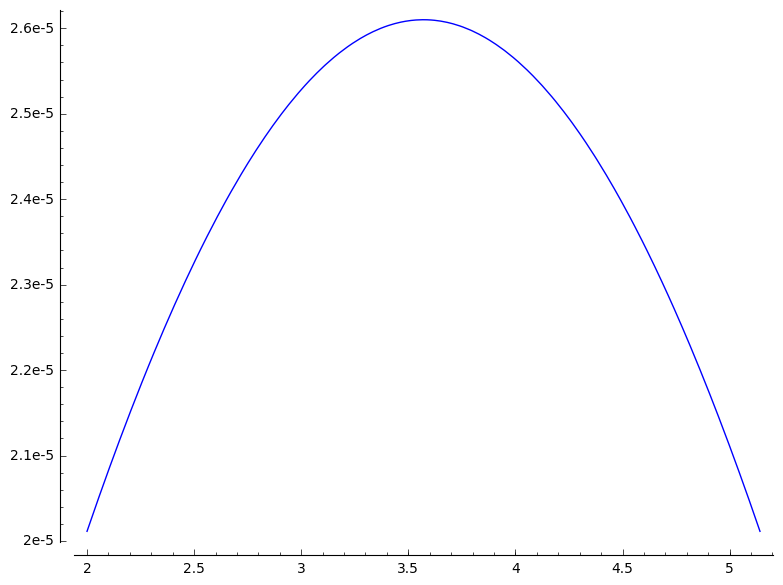

In [46]:
plot(f, (x, 2, pi + 2))

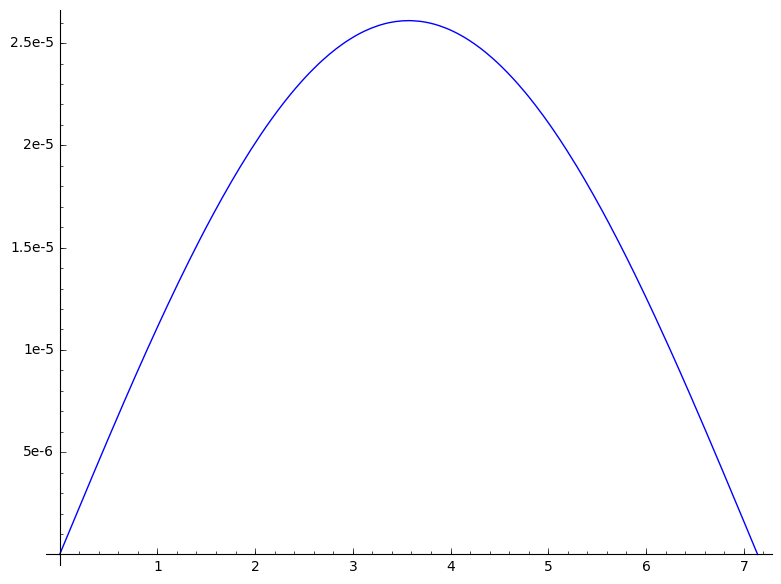

In [47]:
plot(f, (x, 0, pi + 4))

In [48]:
type(f)

<type 'sage.symbolic.expression.Expression'>

In [49]:
f.subs(x == 2 + pi).n()

0.0000201129865683731

In [54]:
f.diff(x).subs(x == 2 + pi).n() * -2

0.0000146342991222699

If the vacuum boundary condition of $-D \frac{d\phi}{dx} = \phi/2$ was equivalent to $\phi(a') = 0$ then the above two expressions would be equal

In [51]:
f

0.0000261000000000000*sin(pi*x/(pi + 4))

In [56]:
import numpy as np

In [63]:
data_dir = "/home/lindsayad/projects/moltres/problems/MooseGold/022317_test_critical_neutronics_only_reactor/"
lin_data = np.loadtxt(data_dir + "linear_gov_eqns0.csv", delimiter=",", skiprows=1)
exp_data = np.loadtxt(data_dir + "exp_gov_eqns_penalty_1000.csv", delimiter=",", skiprows=1)

In [94]:
x_lin_data = lin_data[:, 3]
y_lin_data = lin_data[:, 0]
x_exp_data = exp_data[:, 4]
y_exp_data = exp_data[:, 1]

In [79]:
from sage.plot.scatter_plot import ScatterPlot, scatter_plot

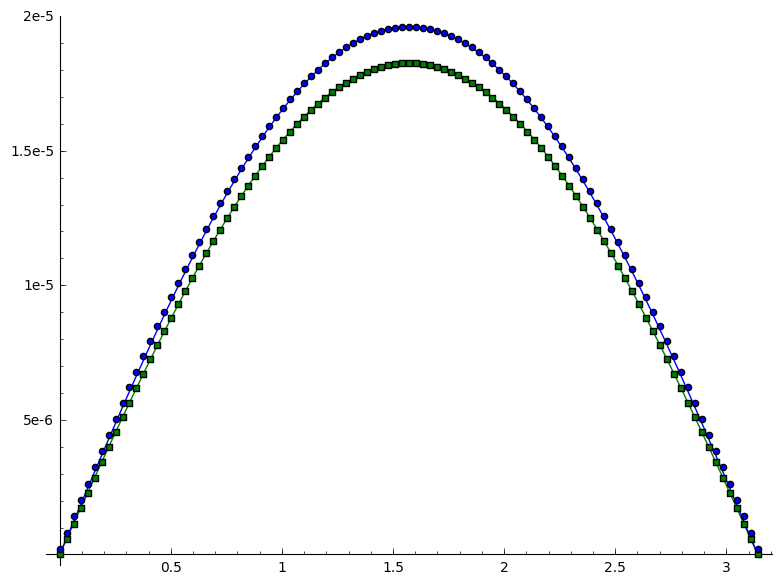

In [113]:
lin_pts = zip(x_lin_data, y_lin_data)
sp_lin = scatter_plot(lin_pts, markersize=20, facecolor='green', marker='s')
exp_pts = zip(x_exp_data, y_exp_data)
sp_exp = scatter_plot(exp_pts, markersize=20, facecolor='blue', marker='o')
g = Graphics()
g += sp_lin
g += sp_exp

h = 1.8252e-5*sin(x)
p = plot(h, (x, 0, pi), color = 'green')
q = plot(1.96078e-5 * sin(x), (x, 0, pi), color = 'blue')
g += p
g += q
g.show()